# Model Summary

After the hyper parameters search on Microsoft Azure this notebook report the results.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
sns.set_style('white')

In [2]:
df = pd.read_csv('../data/processed/final_down.csv')
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)
X = df.iloc[:,:-1]
y = df['Satisfaction']

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, 
                                                    stratify=y,  
                                                    random_state= 42)

In [4]:
# Useful function
import pickle
from sklearn import tree

def metric(classifier, X_train, y_train, X_test, y_test, save_fig = True, name = None, save_mod = True, save_tree = False):
    '''
    classifier: model already initialized
    save_tree = False, If True, then save and export tree
    save_fig = True, Save fig?
    name = None, Name of the model
    save_mod = True, Dump model?
    
    
    Return false positive rate, true positive rate, AUC.
    '''
    classifier.fit(X_train, y_train)
    
    if save_mod:
        pickle.dump(classifier, open('../models/'+name, 'wb'))
    else:
        pass
    
    if save_tree:
        dotfile = open("../reports/figures/tree/tree.dot", 'w')
        dotfile = tree.export_graphviz(classifier, out_file = dotfile, feature_names = X.columns)
    else:
        pass
    
    y_pred = classifier.predict(X_test)
    y_pred_train = classifier.predict(X_train)

    print("f1=====\ntrain: %.3f\ntest: %.3f\n=====" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("\nPrecision=====\ntrain: %.3f\ntest: %.3f\n=====" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = '2d', cmap='Reds')
    plt.title('Confusion matrix - ' + name)
    
    if save_fig:
        plt.savefig('../reports/figures/models/' + name + '.png')
    else:
        pass
    plt.show()
                    
    print(classification_report(y_test, y_pred))
    
    fpr, tpr, auc = roc(classifier, X_test, y_test, y_pred, name)
    return (fpr, tpr, auc, classification_report(y_test, y_pred))



def roc(model, X_test, y_test, y_pred, name, save_fig = True):
    
    y_probs = model.predict_proba(X_test)  

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - ' + name)
    plt.legend()
    if save_fig:
        plt.savefig('../reports/figures/models/' + name + 'AUC.png')
    else:
        pass
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr, auc)

# KNN model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=13)

f1=====
train: 0.837
test: 0.819
=====

Precision=====
train: 0.860
test: 0.842
=====



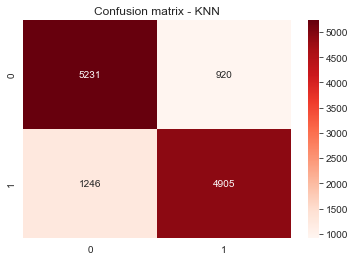

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6151
           1       0.84      0.80      0.82      6151

    accuracy                           0.82     12302
   macro avg       0.82      0.82      0.82     12302
weighted avg       0.82      0.82      0.82     12302



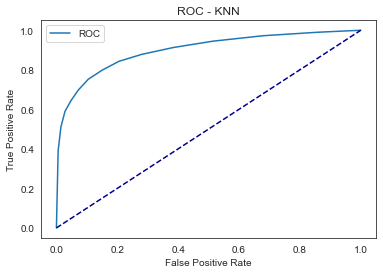

AUC: 0.90


In [17]:
fpr1, tpr1, auc1, report1 = metric(model_knn,X_train,y_train,X_test,y_test, name = 'KNN')

In [18]:
fpr1

array([0.        , 0.00569013, 0.01479434, 0.02812551, 0.04763453,
       0.07202081, 0.10437327, 0.14956918, 0.20533247, 0.28011705,
       0.38384003, 0.5143879 , 0.67875142, 0.85904731, 1.        ])

In [19]:
tpr1

array([0.        , 0.39115591, 0.51081125, 0.58949764, 0.64347261,
       0.69761014, 0.75174768, 0.79743131, 0.84278979, 0.87790603,
       0.91253455, 0.94472444, 0.97219964, 0.98992034, 1.        ])

In [20]:
auc1

0.8982032970121872

In [21]:
print(report1)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6151
           1       0.84      0.80      0.82      6151

    accuracy                           0.82     12302
   macro avg       0.82      0.82      0.82     12302
weighted avg       0.82      0.82      0.82     12302



# Tree classification

f1=====
train: 0.849
test: 0.816
=====

Precision=====
train: 0.881
test: 0.850
=====



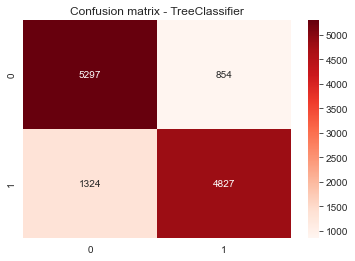

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6151
           1       0.85      0.78      0.82      6151

    accuracy                           0.82     12302
   macro avg       0.82      0.82      0.82     12302
weighted avg       0.82      0.82      0.82     12302



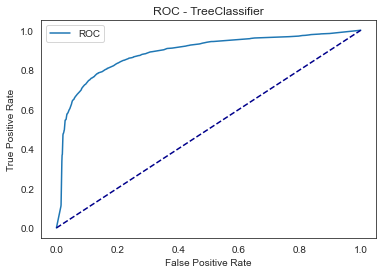

AUC: 0.89


In [22]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_leaf=7, min_samples_split=9)
fpr2, tpr2, auc2, report2 = metric(model_tree,X_train,y_train,X_test,y_test, name = 'TreeClassifier', save_tree=True)

# Naive bayes

f1_score:  0.7273464094666883
f1_test:  0.7273464094666883


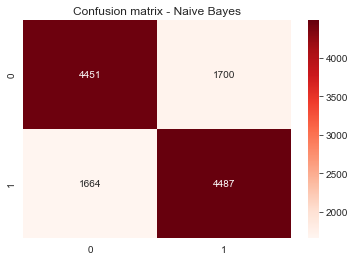

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      6151
           1       0.73      0.73      0.73      6151

    accuracy                           0.73     12302
   macro avg       0.73      0.73      0.73     12302
weighted avg       0.73      0.73      0.73     12302



In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

pickle.dump(model, open('../models/NaiveBayes', 'wb'))

print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = '2d', cmap='Reds')
plt.title('Confusion matrix - Naive Bayes')
plt.savefig('../reports/figures/NaiveBayes.png')
plt.show()

report3 = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

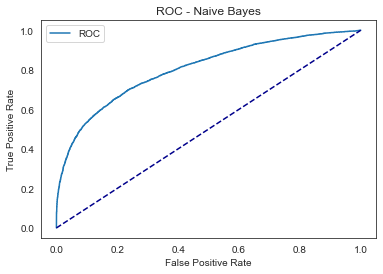

AUC: 0.80


In [28]:
fpr3,tpr3, auc3=roc(model, X_test, y_test, y_pred, 'Naive Bayes')

# Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

f1=====
train: 0.744
test: 0.749
=====

Precision=====
train: 0.745
test: 0.752
=====



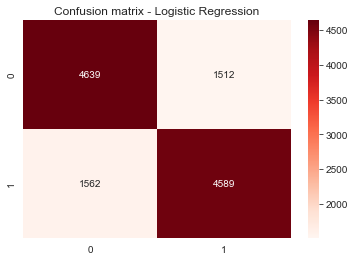

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      6151
           1       0.75      0.75      0.75      6151

    accuracy                           0.75     12302
   macro avg       0.75      0.75      0.75     12302
weighted avg       0.75      0.75      0.75     12302



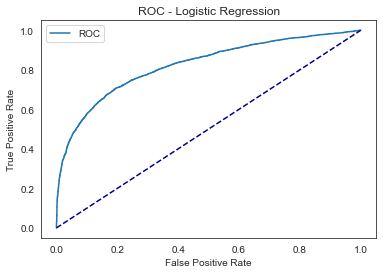

AUC: 0.82


In [6]:
model = LogisticRegression(C=10, max_iter=1000)
fpr4, tpr4, auc4, report4=metric(model,X_train,y_train,X_test,y_test, name = 'Logistic Regression')

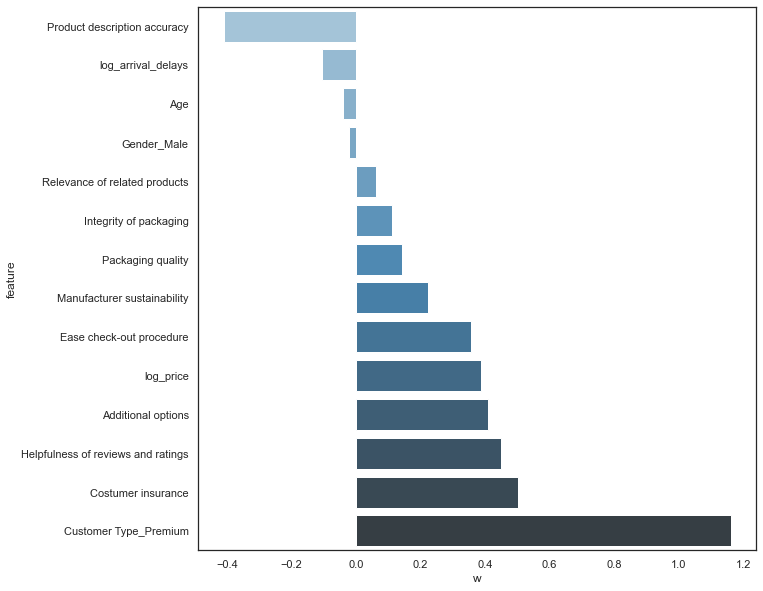

In [8]:
sns.set_style('white')
coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

fig = plt.figure(figsize=(10,10))
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})
plt.savefig('../reports/figures/logistic_coef.png', bbox_inches = 'tight', dpi = 200)
plt.show()

# SVM

f1=====
train: 0.872
test: 0.842
=====

Precision=====
train: 0.896
test: 0.871
=====



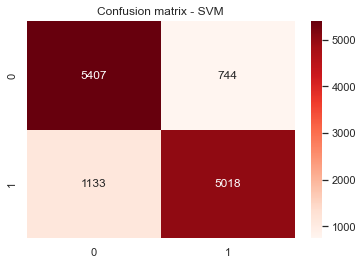

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      6151
           1       0.87      0.82      0.84      6151

    accuracy                           0.85     12302
   macro avg       0.85      0.85      0.85     12302
weighted avg       0.85      0.85      0.85     12302



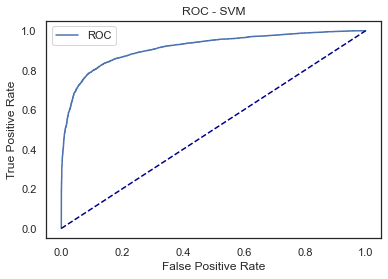

AUC: 0.92


In [32]:
from sklearn.svm import SVC
sns.set_style('white')
model_svc = SVC(C=6, kernel='rbf',probability=True)
fpr5, tpr5, auc5, report5 = metric(model_svc,X_train, y_train, X_test, y_test, name = 'SVM')

# Multi-layer perceptron

f1=====
train: 0.864
test: 0.855
=====

Precision=====
train: 0.881
test: 0.871
=====



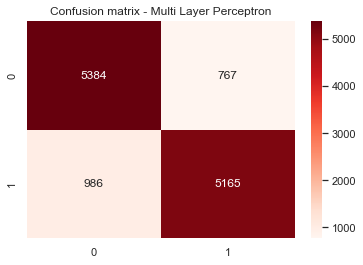

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      6151
           1       0.87      0.84      0.85      6151

    accuracy                           0.86     12302
   macro avg       0.86      0.86      0.86     12302
weighted avg       0.86      0.86      0.86     12302



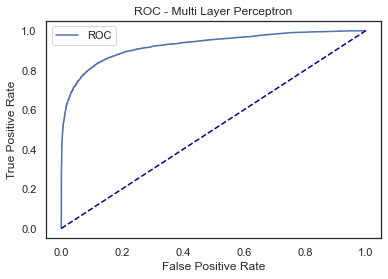

AUC: 0.93


In [39]:
from sklearn.neural_network import MLPClassifier
model_MLP=MLPClassifier(hidden_layer_sizes=(180, 40, 10), alpha=0.7, max_iter=2000)
fpr6, tpr6, auc6, report6=metric(model_MLP,X_train,y_train,X_test,y_test, name ='Multi Layer Perceptron')

# ROC, AUC and Report comparison

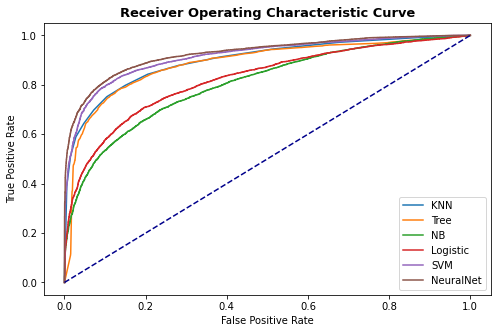

In [47]:
reports = [report1, report2, report3, report4, report5, report6]
models = ["KNN", "Tree", "NB", "Logistic", "SVM", "NeuralNet"]
fig = plt.figure(1, figsize=(8,5))
plt.style.use('default')
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve', weight='bold', size=13)
plt.legend()
plt.savefig('../reports/figures/ROCcurves.png', dpi = 200)
plt.show()

In [48]:
AUCs = {"Model": ["KNN", "Tree", "NB", "Logistic", "SVM", "NeuralNet"], "AUC":[auc1, auc2, auc3, auc4, auc5, auc6]}
AUCs = pd.DataFrame(AUCs)
AUCs.set_index(keys = AUCs['Model'], inplace=True)

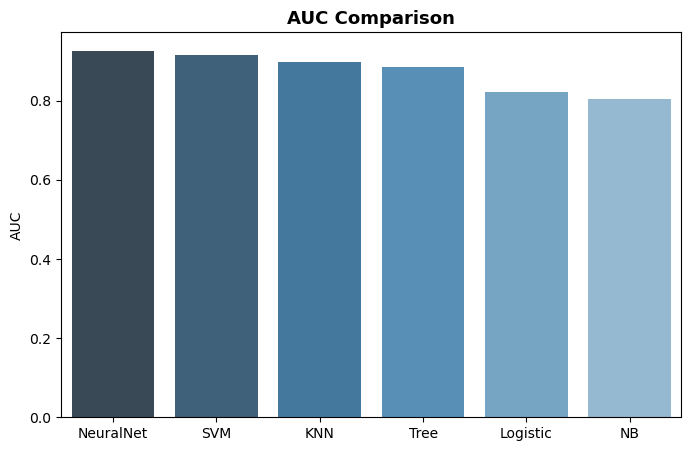

In [49]:
AUCs.sort_values(by='AUC', ascending=False, inplace=True)
fig = plt.figure(1, figsize=(8,5))
sns.barplot(x = 'Model', y='AUC', data = AUCs, palette='Blues_r_d');
plt.xlabel('')
plt.title('AUC Comparison', weight = 'bold', fontsize = 13)
plt.savefig('../reports/figures/AUCs.png', dpi = 200)

In [37]:
for report, model in zip(reports, models):
    print("==========\n" + model + "\n" + report + "\n==========\n")

KNN
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6151
           1       0.84      0.80      0.82      6151

    accuracy                           0.82     12302
   macro avg       0.82      0.82      0.82     12302
weighted avg       0.82      0.82      0.82     12302


Tree
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6151
           1       0.85      0.78      0.82      6151

    accuracy                           0.82     12302
   macro avg       0.82      0.82      0.82     12302
weighted avg       0.82      0.82      0.82     12302


NB
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      6151
           1       0.73      0.73      0.73      6151

    accuracy                           0.73     12302
   macro avg       0.73      0.73      0.73     12302
weighted avg       0.73      0.73      0.73     12302


Logi